In [157]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### data

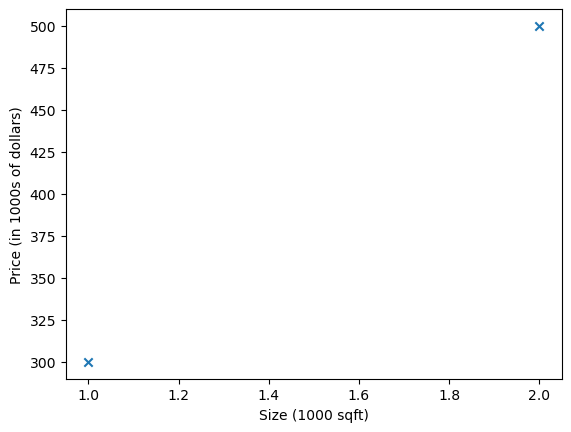

In [159]:
X_train = np.array([[1.0], 
                    [2.0]], 
                   dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], 
                    [500.0]], 
                   dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x')
ax.set_ylabel('Price (in 1000s of dollars)')
ax.set_xlabel('Size (1000 sqft)')
plt.show()

### linear activation

In [161]:
# defining a layer with a neuron
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

linear_layer.get_weights()

In [165]:
# the input to the layer must be 2-D, so we'll reshape it.
# shape before reshaping
print(X_train[0].shape)

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

# print(X_train[0])
# print(X_train[0].reshape(1,1))

(1,)
[1.]
[[1.]]
tf.Tensor([[-0.910275]], shape=(1, 1), dtype=float32)


In [175]:
w, b= linear_layer.get_weights()
print("W = ", w)
print("b = ", b)

W =  [[200.]]
b =  [100.]


In [179]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


### comparing Tensorflow's linear_layer & linear regression model

In [185]:
# linear layer
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

#linear regression  f(x) = W . X + b 
lin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(lin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


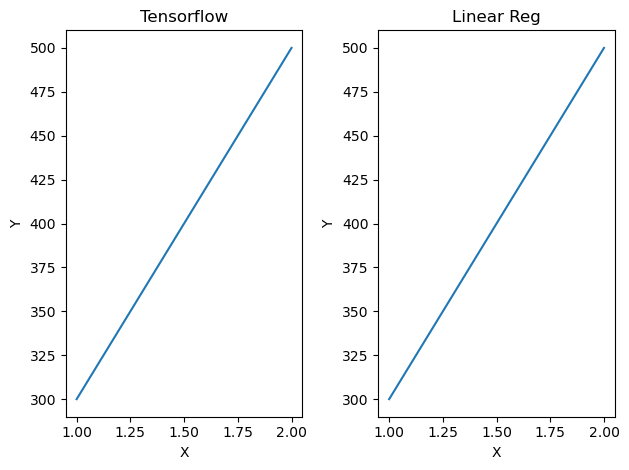

In [204]:
prediction_tensorflow = linear_layer(X_train)
prediction_linearReg = np.dot( X_train, set_w) + set_b


plt.subplot(1, 2, 1)  # (rows, columns, index of the subplot)
plt.plot(X_train, prediction_tensorflow)
plt.title('Tensorflow')
plt.xlabel('X')
plt.ylabel('Y')


plt.subplot(1, 2, 2)
plt.plot(X_train, prediction_linearReg)
plt.title('Linear Reg')
plt.xlabel('X')
plt.ylabel('Y')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## sigmoid activation / logistic neuron

In [275]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

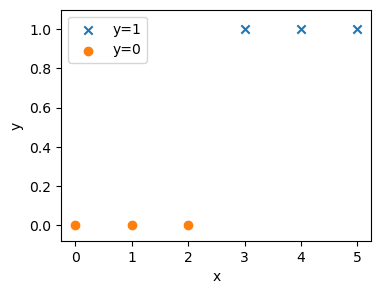

In [277]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', label="y=0")

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend()
plt.show()

In [279]:
# create a Tensorflow Model that contains the logistic layer
# sequential = multi - layer 
model = Sequential([tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')])

In [281]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [283]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()

print(w,b)
print(w.shape,b.shape)

[[-0.77001464]] [0.]
(1, 1) (1,)


In [285]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


## comparing t

In [290]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

z = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
log =  1 / (1 + np.exp(-z))
print(log)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.01098694]]
[[0.01098694]]
